## **Superstore Performance Analysis**
### 1.1 Project Goal and Scope: 
#### This project aims to perform a comprehensive Exploratory Data Analysis (EDA) on the Superstore sales dataset to identify key drivers of profit, assess regional performance, and provide actionable recommendations for optimizing business strategy.

### 1.2 Importing Required Libraries and Data Loading

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv(r'D:\Superstore sales project\Sample-Superstore.csv', encoding='latin-1')

## 2. Data Inspection and Cleaning 

### 2.1 Initial Data Overview (Head, Columns, Info, Describe)

In [155]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [156]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [157]:
df.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

### 2.2 Datatype Conversion, Missing Value Check and Handling Duplicates.

In [158]:
pd.isnull(df)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [159]:
pd.isnull(df).sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [160]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [161]:
df.drop_duplicates(inplace=True)

In [162]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [163]:
df['Order Date'].dtype

dtype('O')

In [164]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [165]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [166]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [167]:
data = df[df['Sales'] < 0]
print(data)

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


In [168]:
data = (df['Sales'] < 0).sum()
print(data)

0


In [169]:
data = (df['Profit'] < 0).sum()
print(data)

1871


### 2.3 Created Required Columns.

In [170]:
df['total_profit'] = df['Profit'].sum()
print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [171]:
df['total_sales'] = df['Sales'].sum()

In [172]:
df['profit_margin'] = df['Sales'] / df['Profit']
print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [173]:
df['Sales'] = df['Sales'].astype(int)

In [174]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                     int64
Quantity                  int64
Discount                float64
Profit                  float64
total_profit            float64
total_sales             float64
profit_margin           float64
dtype: object

In [175]:
df['ship_days'] = df['Ship Date'] - df['Order Date']
print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson 

In [176]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [177]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'total_profit', 'total_sales', 'profit_margin', 'ship_days'],
      dtype='object')

## 3. Exploratory Data Analysis

### 3.1 Geographic Analysis: Sales and Profit by Region

Text(0.5, 1.0, 'Total Sales By Region')

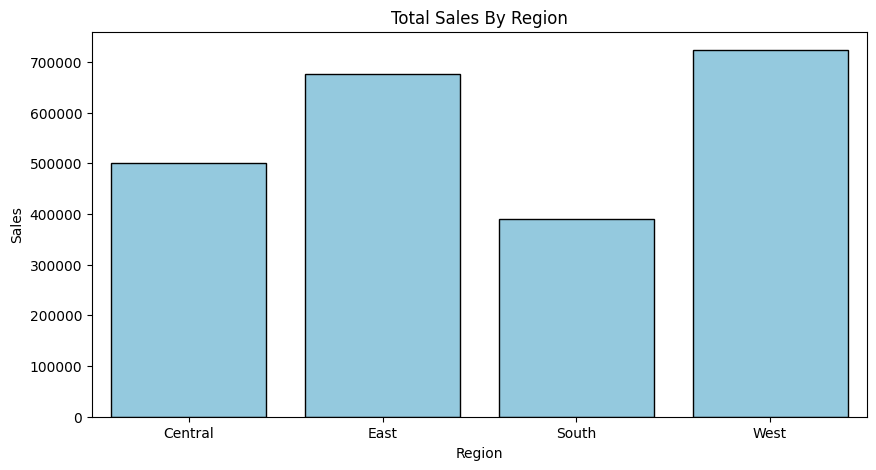

In [178]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Sales', data=region_sales, color='skyblue', edgecolor='black')
plt.title("Total Sales By Region")

Text(0.5, 1.0, 'Total Profit by Region')

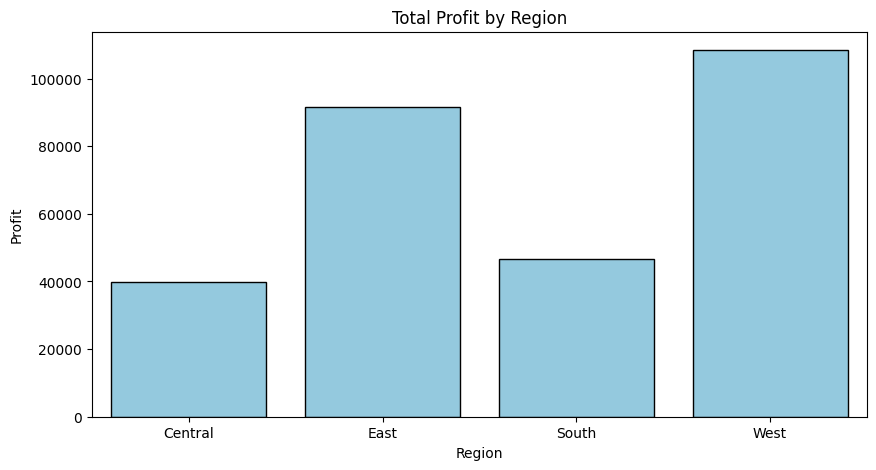

In [179]:
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y='Profit', data=region_profit, color='skyblue', edgecolor='black')
plt.title("Total Profit by Region")

Insights from the above graphs: 
- We can see that the **West Region** has the **Highest Sales and Profit**.

### 3.2 Categorical Analysis: Product Category and Segment Performance.

Text(0.5, 1.0, 'Total Sales by Category')

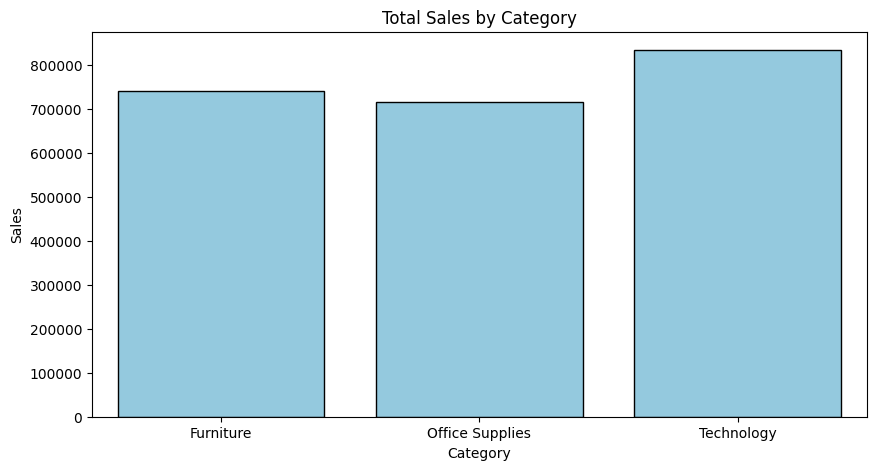

In [180]:
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Sales', data=category_sales, color='skyblue', edgecolor='black')
plt.title("Total Sales by Category")

Text(0.5, 1.0, 'Total Profit by Category')

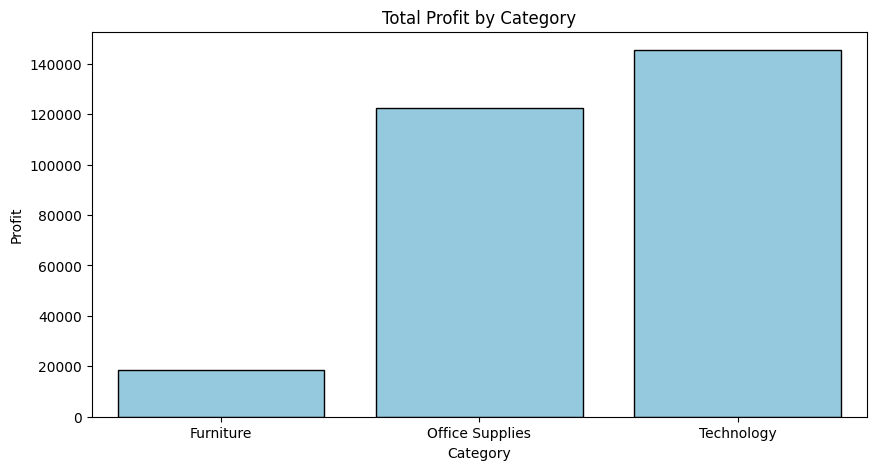

In [181]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Category', y='Profit', data=category_profit, color='skyblue', edgecolor='black')
plt.title("Total Profit by Category")

Insight from the above graphs:
1. We can see that **Technology Category** is most **Profitable**.
2. **Furniture Category** fails to deliver much profit as comapared to its Sales.

### 3.3 Time Series Analysis: Sales Trends Over Time (Monthly Sales and Profit Trends).

In [182]:
df['Order Month Num'] = df['Order Date'].dt.month
print(df[['Order Month Num', 'Order Date']].head())

   Order Month Num Order Date
0               11 2016-11-08
1               11 2016-11-08
2                6 2016-06-12
3               10 2015-10-11
4               10 2015-10-11


In [183]:
df['Order Month Name'] = df['Order Date'].dt.strftime('%b')
print(df[['Order Date', 'Order Month Name']].head())

  Order Date Order Month Name
0 2016-11-08              Nov
1 2016-11-08              Nov
2 2016-06-12              Jun
3 2015-10-11              Oct
4 2015-10-11              Oct


Text(0.5, 0, 'Month Name')

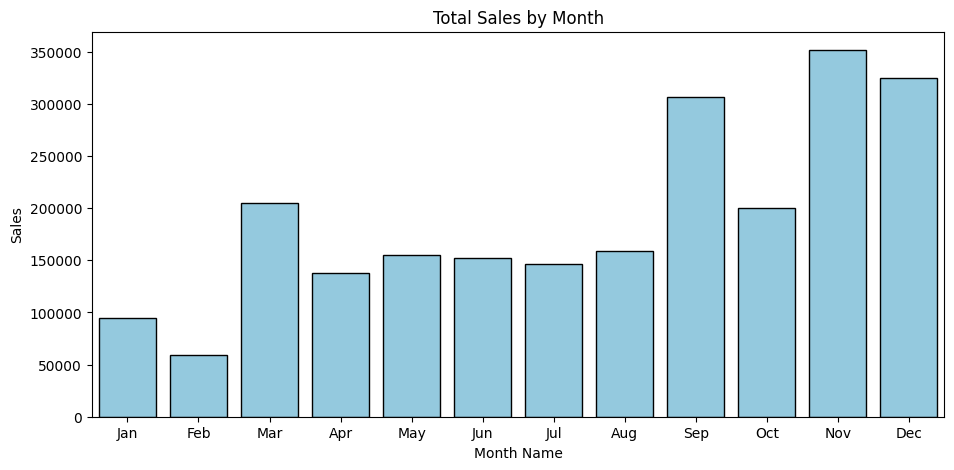

In [184]:
monthly_sales = df.groupby(['Order Month Num', 'Order Month Name'])['Sales'].sum().reset_index()
plt.figure(figsize=(11,5))
sns.barplot(x='Order Month Name', y='Sales', data=monthly_sales, color='skyblue', edgecolor='black')
plt.title("Total Sales by Month")
plt.xlabel("Month Name")

Text(0.5, 0, 'Month Name')

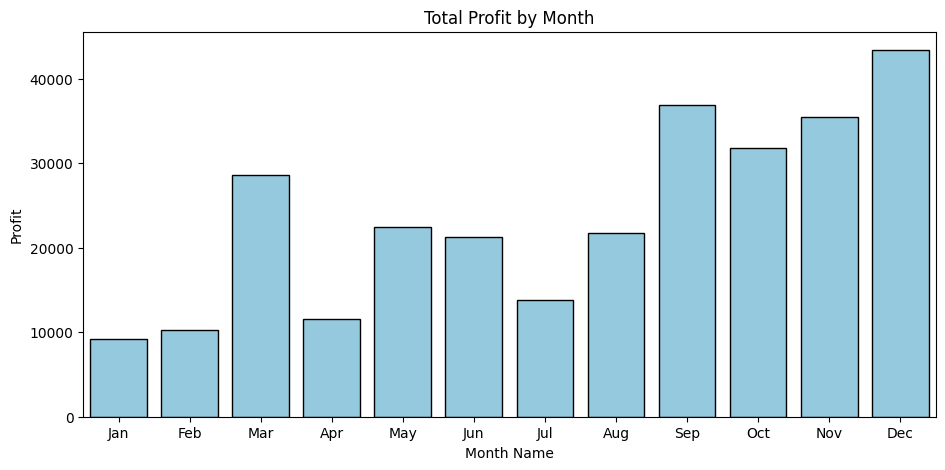

In [185]:
monthly_sales = df.groupby(['Order Month Num', 'Order Month Name'])['Profit'].sum().reset_index()
plt.figure(figsize=(11,5))
sns.barplot(x='Order Month Name', y='Profit', data=monthly_sales, color='skyblue', edgecolor='black')
plt.title("Total Profit by Month")
plt.xlabel("Month Name")

Insights from the above graphs:
- We can see that the Sales and Profit peaked in **Nov - Dec**.

### 3.4 Correlation Analysis: Discount vs. Profit

<Axes: xlabel='Discount', ylabel='Profit'>

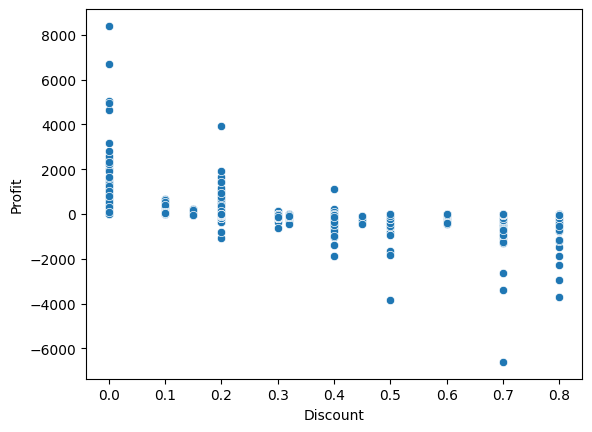

In [186]:
sns.scatterplot(x='Discount', y='Profit', data=df)

Insights:
1. We can see that when the **Discount is High,** the **Profit is Negative**.
2. When there is **No Discount,** the **Profit is High**.

In [187]:
corr_matrix = df[['Sales', 'Profit', 'Discount']].corr()
print(corr_matrix)

             Sales    Profit  Discount
Sales     1.000000  0.479048 -0.028143
Profit    0.479048  1.000000 -0.219487
Discount -0.028143 -0.219487  1.000000


Text(0.5, 1.0, 'Correlation Heatmap (Sales, Profit, Discount)')

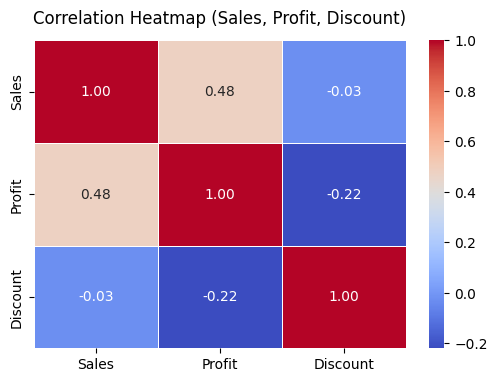

In [188]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title("Correlation Heatmap (Sales, Profit, Discount)", pad=12)

Insight from the above Heatmap:
1. **Sales** and **Profit** have **moderate positive correlation** means when Sales increase, Profit generally increases too - but not always.
2. **Discount** and **Profit** have **weak negative correlation** means when Discounts increase, Profit tends to decrease slightly.
3. **Discount** and **Sales** have almost **zero correlation** means Discounts show almost no link with Sales volume.

## 4. ***Key Findings and Actionable Recommendation:***

## ***4.1 Summary of Key Insights:***
#### - **West Region** has the Highest Sales and Profit.
#### - **Technology Category** performs best across all segments.
#### - Sales and Profit peaked in **Nov - Dec** indicating the Strong Seasonal Trends.
#### - Discounts **above 40%** leads to lower profits.
#### - Business is earning more **Profit as Sales grow**, but **offering Discounts** is not helping increasing Sales - but slightly **reduces Profit**.

## ***4.2 Business Recommendations:***
#### - Allocate more Sales Resources and Promotions in the the **Central Region**, which lags behind the East and West in both Profit and Sales.
#### - Focus on marketing, inventory and new product launces in **Technology Category**, as it delivers the highest profit margin and consistent growth.
#### - Increase Marketing Campaigns during **November - December**, when sales peak due to the holiday season.
#### - Limit or restructure discounts specially in **Office Supply and Furniture Category**, since these leads to negative profits.